#### Case study - Credit EDA 

#### Importing all required lib

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import jovian as jvn

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


<IPython.core.display.Javascript object>

In [21]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [4]:
# Reading the applications data csv file
app_file=pd.read_csv('application_data.csv')
app_file.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
app_file.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
# We got to know the data size , next to clean the data
app_file.shape

(307511, 122)

#### Data_Cleaning

In [7]:
app_file.info(verbose=True , null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

#### No data types are damaged, so not required any changes at this moment.

In [10]:
# Find per of null values for each columns in dataset

In [198]:
#rounding of the per to req digits
app_file.isna().mean().round(3)*100

SK_ID_CURR                      0.0
TARGET                          0.0
NAME_CONTRACT_TYPE              0.0
CODE_GENDER                     0.0
FLAG_OWN_CAR                    0.0
FLAG_OWN_REALTY                 0.0
CNT_CHILDREN                    0.0
AMT_INCOME_TOTAL                0.0
AMT_CREDIT                      0.0
AMT_ANNUITY                     0.0
AMT_GOODS_PRICE                 0.1
NAME_TYPE_SUITE                 0.4
NAME_INCOME_TYPE                0.0
NAME_EDUCATION_TYPE             0.0
NAME_FAMILY_STATUS              0.0
NAME_HOUSING_TYPE               0.0
REGION_POPULATION_RELATIVE      0.0
DAYS_BIRTH                      0.0
DAYS_EMPLOYED                   0.0
DAYS_REGISTRATION               0.0
DAYS_ID_PUBLISH                 0.0
OWN_CAR_AGE                    66.0
FLAG_MOBIL                      0.0
FLAG_EMP_PHONE                  0.0
FLAG_WORK_PHONE                 0.0
FLAG_CONT_MOBILE                0.0
FLAG_PHONE                      0.0
FLAG_EMAIL                  

In [202]:
# Checking percentage of missing values more precisely
app_file.isnull().sum().round(4)/len(app_file)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.089754
NAME_TYPE_SUITE                 0.419501
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OWN_CAR_AGE                    65.990478
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE 

#### Morethan 50% of null values are detcted for apartments_avg. But like apartments area can give some insights like can understand people living conditions. Apart from apartment_avg wil drop the rest of columns. 

In [23]:
col_to_drop=app_file.loc[:,'BASEMENTAREA_AVG':'EMERGENCYSTATE_MODE'].columns
app_file.drop(col_to_drop, inplace=True, axis=1)
app_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [24]:
app_file.shape

(307511, 76)

#### Flag documents have no relevant information to our analysis, so we dont have enough information in these documents are , so we can drop these as well.

In [26]:
col_to_drop = app_file.loc[:,'FLAG_DOCUMENT_2':'FLAG_DOCUMENT_21'].columns
app_file.drop(col_to_drop, inplace=True, axis=1)
app_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

#### Handling Missing Values

In [199]:
# Find percentage of null values for each columns
app_file.isna().mean().round(3) * 100

SK_ID_CURR                      0.0
TARGET                          0.0
NAME_CONTRACT_TYPE              0.0
CODE_GENDER                     0.0
FLAG_OWN_CAR                    0.0
FLAG_OWN_REALTY                 0.0
CNT_CHILDREN                    0.0
AMT_INCOME_TOTAL                0.0
AMT_CREDIT                      0.0
AMT_ANNUITY                     0.0
AMT_GOODS_PRICE                 0.1
NAME_TYPE_SUITE                 0.4
NAME_INCOME_TYPE                0.0
NAME_EDUCATION_TYPE             0.0
NAME_FAMILY_STATUS              0.0
NAME_HOUSING_TYPE               0.0
REGION_POPULATION_RELATIVE      0.0
DAYS_BIRTH                      0.0
DAYS_EMPLOYED                   0.0
DAYS_REGISTRATION               0.0
DAYS_ID_PUBLISH                 0.0
OWN_CAR_AGE                    66.0
FLAG_MOBIL                      0.0
FLAG_EMP_PHONE                  0.0
FLAG_WORK_PHONE                 0.0
FLAG_CONT_MOBILE                0.0
FLAG_PHONE                      0.0
FLAG_EMAIL                  

In [203]:
#AMT_ANNUITY
app_file[app_file['AMT_ANNUITY'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG,AGE_Ref,EMP_EXPERIENCE,Credit_Bureau_Total,PREV_AMT_CREDIT,PREV_CONTRACT_STATUS,PREV_REJECT_REASON,PREV_YIELD_GROUP,PREV_DAYS_TERMINATION,AGE_GRP,TARGET_CATEGORY
47529,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Unaccompanied,Commercial associate,Incomplete higher,Single,House / apartment,0.026392,-10668,-2523,-4946.0,-3238,NaN,1,1,1,1,1,0,High skill tech staff,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,NaN,0.626896,0.372334,0.0124,1.0,0.0,1.0,0.0,-2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.499615,30.0,6.9,2.0,71806.5,Approved,XAP,middle,-318.0,<30,safe
50033,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Unaccompanied,Working,Lower secondary,Married,House / apartment,0.035792,-9027,-1270,-3640.0,-741,NaN,1,1,1,1,0,0,Laborers,2.0,2,2,MONDAY,20,0,0,0,0,0,0,Business Entity Type 1,NaN,0.727274,0.468660,NaN,0.0,0.0,0.0,0.0,-706.0,0.0,0.0,0.0,1.0,0.0,1.0,0.597967,25.0,3.5,2.0,101457.0,Approved,XAP,low_action,-338.0,<30,safe
51592,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-17376,-3950,-11524.0,-831,NaN,1,1,0,1,0,0,Cooking staff,2.0,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed,0.885980,0.738370,0.452534,NaN,1.0,0.0,1.0,0.0,-199.0,0.0,0.0,0.0,1.0,0.0,1.0,0.692295,48.0,10.8,2.0,45000.0,Approved,XAP,XNA,NaN,40-50,safe
55023,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.035792,-11329,-2040,-3195.0,-3069,NaN,1,1,0,1,0,0,Core staff,2.0,2,2,FRIDAY,13,0,0,0,1,1,1,Government,0.336803,0.566316,0.220095,NaN,0.0,0.0,0.0,0.0,-2841.0,0.0,0.0,0.0,1.0,0.0,4.0,0.374405,32.0,5.6,5.0,0.0,Refused,HC,XNA,NaN,30-40,safe
59932,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.046220,-19762,-2498,-11285.0,-3305,4.0,1,1,1,1,1,0,Laborers,1.0,1,1,FRIDAY,15,0,1,1,0,1,1,Other,0.647350,0.583947,0.177704,0.0856,0.0,0.0,0.0,0.0,-743.0,0.0,0.0,1.0,0.0,0.0,6.0,0.469667,55.0,6.8,7.0,1004544.0,Canceled,XAP,high,NaN,50-60,safe
75871,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Unaccompanied,Working,Higher education,Single,Rented apartment,0.022800,-20831,-2450,-771.0,-4203,8.0,1,1,0,1,0,0,Drivers,1.0,2,2,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.339389,0.667564,0.425893,0.0928,0.0,0.0,0.0,0.0,-1986.0,0.0,0.0,0.0,0.0,0.0,11.0,0.477615,58.0,6.7,11.0,202500.0,Approved,XAP,middle,NaN,50-60,safe
89341,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.015221,-12134,-3721,-858.0,-591,2.0,1,1,0,1,1,0,Medicine staff,2.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Medicine,0.682126,0.154811,0.297087,0.1227,0.0,0.0,0.0,0.0,-348.0,0.0,0.0,0.0,2.0,0.0,0.0,0.378008,34.0,10.2,2.0,69412.5,Approved,XAP,low_normal,-41.0,30-40,safe
123870,243648,0

In [204]:
#Just verifying the age difference between for own car and not owned car cust 

app_file[app_file['FLAG_OWN_CAR']=='N'][['FLAG_OWN_CAR','OWN_CAR_AGE']].head()

,FLAG_OWN_CAR,OWN_CAR_AGE
0,N,NaN
1,N,NaN
3,N,NaN
4,N,NaN
5,N,NaN


#### Could see N and NaN for both car users

#### 31% null values-OCCUPATION_TYPE , which can be imputed with a occupation category 'Other_type'

In [31]:
app_file.OCCUPATION_TYPE.fillna('Other_type', inplace = True)
app_file.OCCUPATION_TYPE.value_counts(normalize=True)*100

Other_type               31.345545
Laborers                 17.946025
Sales staff              10.439301
Core staff                8.965533
Managers                  6.949670
Drivers                   6.049540
High skill tech staff     3.700681
Accountants               3.191105
Medicine staff            2.776161
Security staff            2.185613
Cooking staff             1.933589
Cleaning staff            1.513117
Private service staff     0.862408
Low-skill Laborers        0.680626
Waiters/barmen staff      0.438358
Secretaries               0.424375
Realty agents             0.244219
HR staff                  0.183083
IT staff                  0.171051
Name: OCCUPATION_TYPE, dtype: float64

#### Since EXT_SOURCE columns have notable nulls. These columns can given noting scores by outside agencies. Since all other applications doesnt have all the values, itwill be meaningfull f we take mean of these three values to analyse further. we can add a new separate column with average of the scores

In [32]:
app_file['EXT_SOURCE_AVG'] = app_file.loc[:, ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis=1)
app_file['EXT_SOURCE_AVG']

0         0.161787
1         0.466757
2         0.642739
3         0.650442
4         0.322738
            ...   
307506    0.413601
307507    0.115992
307508    0.499536
307509    0.587593
307510    0.518984
Name: EXT_SOURCE_AVG, Length: 307511, dtype: float64

#### Outliers

In [34]:
app_file.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307339.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974,0.509251
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.384280,0.399526,0.043164,0.449521,0.231307,0.910682,0.509034,0.502737,3.265832,0.122126,0.219526,0.197499,0.268444,0.421124,0.383817,0.211062,1.910602e-01,0.194844,0.10824,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295,0.149802
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,8.173617e-08,0.000527,0.00000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.334007,3.924574e-01,0.370650,0.05770,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.413648
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.505998,5.659614e-01,0.535276,0.08760,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.524502
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,

#### To analyse AMT_CREDIT column to check for outliers

In [35]:
app_file.AMT_CREDIT.describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

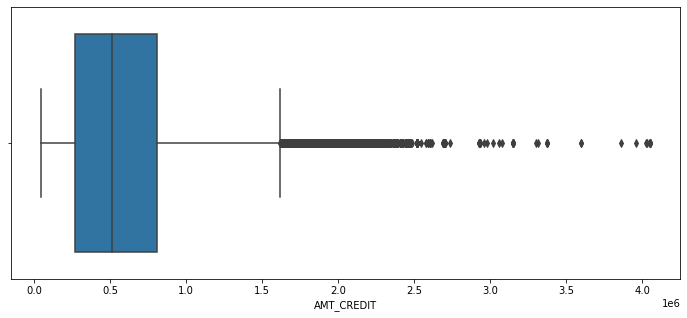

In [39]:
plt.figure(figsize=[12,5])
sns.boxplot(app_file.AMT_CREDIT)
plt.show()

In [40]:
app_file.AMT_CREDIT.quantile([.5, .7, .9, .95, 0.99])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [42]:
# Check rows that lies above the 99th percentile
app_file[app_file.AMT_CREDIT > 1854000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG
189,100219,0,Cash loans,M,N,Y,1,315000.0,2250000.0,83515.5,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,-11177,-1514,-64.0,-2793,NaN,1,1,0,1,0,1,Core staff,3.0,1,1,FRIDAY,16,0,0,0,0,0,0,Business Entity Type 3,0.380092,0.693358,NaN,0.4753,0.0,0.0,0.0,0.0,-926.0,0.0,0.0,0.0,0.0,0.0,3.0,0.536725
337,100389,0,Cash loans,M,Y,Y,0,247500.0,1971072.0,68643.0,1800000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.006207,-14216,-365,-3183.0,-4423,13.0,1,1,1,1,0,0,Core staff,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Self-employed,0.558582,0.748204,0.739412,0.2227,0.0,0.0,0.0,0.0,-2421.0,0.0,0.0,0.0,0.0,0.0,1.0,0.682066
341,100393,0,Cash loans,M,Y,Y,2,405000.0,2250000.0,59485.5,2250000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.007114,-14966,-6158,-954.0,-4979,6.0,1,1,0,1,1,0,Core staff,4.0,2,2,FRIDAY,13,0,0,0,0,0,0,Police,NaN,0.682320,0.692559,0.1763,0.0,0.0,0.0,0.0,-1014.0,0.0,0.0,0.0,0.0,0.0,1.0,0.687440
441,100508,0,Cash loans,F,Y,Y,0,450000.0,1971072.0,62019.0,1800000.0,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,0.032561,-18268,-2569,-4292.0,-1699,1.0,1,1,0,1,1,1,Managers,2.0,1,1,WEDNESDAY,13,0,0,0,0,0,0,Trade: type 3,0.746108,0.774368,0.344155,0.1814,0.0,0.0,0.0,0.0,-523.0,0.0,0.0,0.0,0.0,4.0,1.0,0.621544
485,100559,0,Cash loans,F,Y,Y,0,450000.0,2286211.5,116266.5,2182500.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.018850,-20589,-13994,-5893.0,-4106,7.0,1,1,0,1,0,0,Core staff,2.0,2,2,MONDAY,16,0,0,0,0,0,0,Security Ministries,NaN,0.503266,NaN,0.1485,1.0,0.0,1.0,0.0,-2675.0,NaN,NaN,NaN,NaN,NaN,NaN,0.503266
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307055,455739,0,Cash loans,F,N,Y,0,112500.0,2032992.0,70794.0,1755000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.072508,-19981,-3665,-5642.0,-3402,NaN,1,1,0,1,0,0,Medicine staff,2.0,1,1,TUESDAY,13,0,0,0,0,0,0,Medicine,NaN,0.747726,0.624615,0.3175,1.0,0.0,1.0,0.0,-1866.0,0.0,0.0,0.0,0.0,0.0,5.0,0.686170
307095,455785,0,Cash loans,F,Y,Y,0,135000.0,2013840.0,53253.0,1800000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.031329,-20296,365243,-5953.0,-1633,3.0,1,0,0,1,0,0,Other_type,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,XNA,0.546025,0.212177,0.746300,0.1186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.501501
307165,455868,0,Cash loans,F,Y,Y,0,337500.0,1890000.0,71986.5,1890000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,-10595,-3636,-1100.0,-1099,6.0,1,1,0,1,0,0,Accountants,2.0,1,1,TUESDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.681877,0.688314,NaN,0.3629,14.0,1.0,14.0,1.0,-698.0,0.0,0.

#### To analyse AMT_INCOME_TOTAL to check for outliers

In [44]:
app_file.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

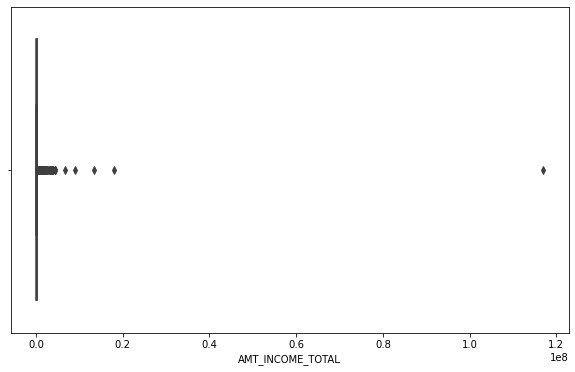

In [45]:
plt.figure(figsize=[10,6])
sns.boxplot(app_file.AMT_INCOME_TOTAL)
plt.show()

we could see literally one outliers is more different than others, lets analyse it more where quantiles stay 

In [47]:
app_file.AMT_INCOME_TOTAL.quantile([.5, .7, .9, .95, 0.99, 0.999, 0.9999])

0.5000     147150.0
0.7000     180000.0
0.9000     270000.0
0.9500     337500.0
0.9900     472500.0
0.9990     900000.0
0.9999    2250000.0
Name: AMT_INCOME_TOTAL, dtype: float64

Checking the values which is above than outisde of 99th quantile

In [48]:
app_file[app_file.AMT_INCOME_TOTAL > 0.2*10**8]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG
12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,26194.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010643,-12615,-922,-6762.0,-3643,NaN,1,1,0,1,0,0,Laborers,3.0,2,2,TUESDAY,14,0,0,0,0,0,0,Business Entity Type 3,0.460809,0.113161,0.145543,0.1031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.239838


In [50]:
app_file = app_file[~(app_file.AMT_INCOME_TOTAL > 0.2*10**8)]
app_file.shape

(307510, 57)

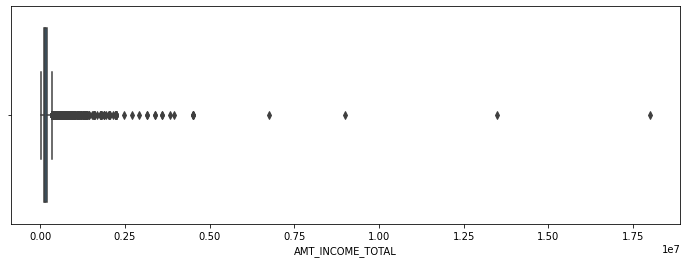

In [51]:
plt.figure(figsize=[12,4])
sns.boxplot(app_file.AMT_INCOME_TOTAL)
plt.show()

We have checked the above for income again, which is there are other outliers as well.But these are meaning outliers , we can keep those

Analyse AMT_GOODS_PRICE - Outliers check

Some application expects more relatively higher credits,bu thats nothing way out of the line here. 
We observed that  many of them have goods price  which is also very close to the credit,
so it proves and the rows can be kept as it is

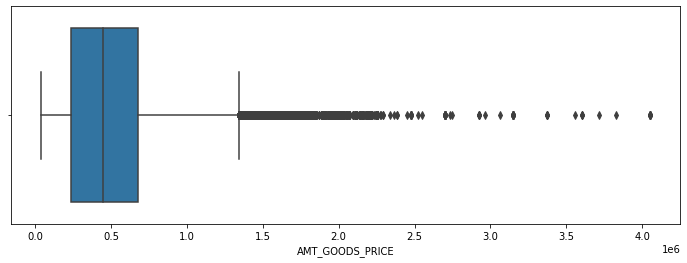

In [53]:
plt.figure(figsize=[12,4])
sns.boxplot(app_file.AMT_GOODS_PRICE)
plt.show()

Checking DAYS_BIRTH column for outliers

In [54]:
app_file.DAYS_BIRTH.describe()

count    307510.000000
mean     -16037.006195
std        4363.991364
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

Values stored as number of days since birth, which is not comprehensible, so adding a a new column age in years by transforming  and analyse that with comparison

In [56]:
app_file['AGE_Ref'] = np.ceil(app_file.DAYS_BIRTH / -365)
app_file.AGE_Ref.describe()

count    307510.000000
mean         44.433121
std          11.954500
min          21.000000
25%          35.000000
50%          44.000000
75%          54.000000
max          70.000000
Name: AGE_Ref, dtype: float64

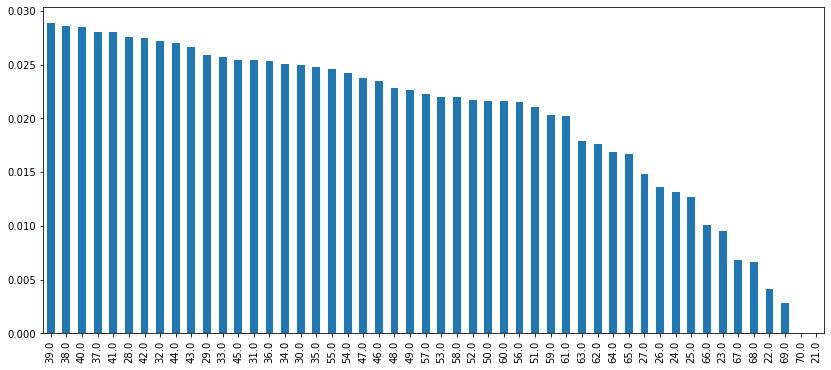

In [73]:
app_file['AGE_Ref'].value_counts(normalize=True).plot.bar(figsize=[14,6])
plt.show()

We could see 69 is the max age factor , which is fine. no unusuall here

In [205]:
# object data type colums analysing in depdth

app_file.columns[app_file.dtypes=="object"].tolist()

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'PREV_CONTRACT_STATUS',
 'PREV_REJECT_REASON',
 'PREV_YIELD_GROUP',
 'TARGET_CATEGORY']

Cash loans         0.904793
Revolving loans    0.095207
Name: NAME_CONTRACT_TYPE, dtype: float64


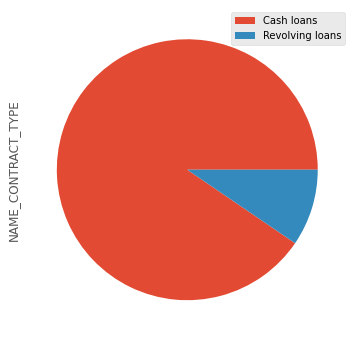

F      0.658344
M      0.341643
XNA    0.000013
Name: CODE_GENDER, dtype: float64


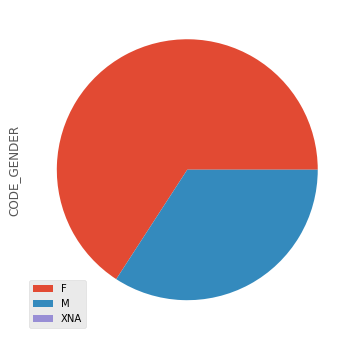

N    0.659889
Y    0.340111
Name: FLAG_OWN_CAR, dtype: float64


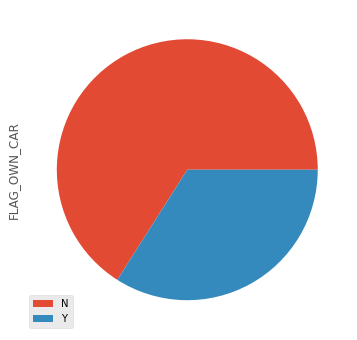

Y    0.69367
N    0.30633
Name: FLAG_OWN_REALTY, dtype: float64


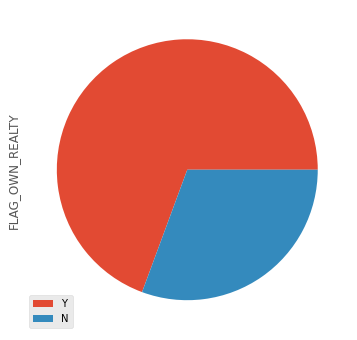

Unaccompanied      0.811595
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64


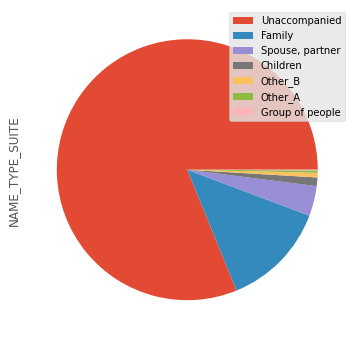

Working                 0.516322
Commercial associate    0.232888
Pensioner               0.180034
State servant           0.070577
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64


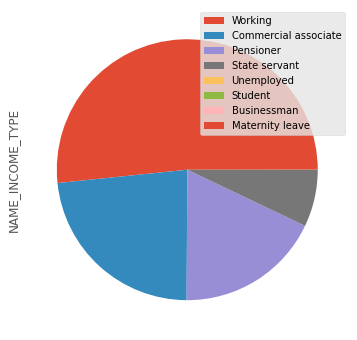

Secondary / secondary special    0.710193
Higher education                 0.243447
Incomplete higher                0.033420
Lower secondary                  0.012406
Academic degree                  0.000533
Name: NAME_EDUCATION_TYPE, dtype: float64


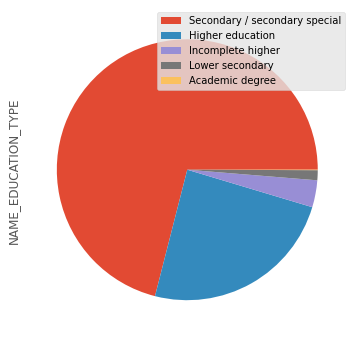

Married      0.735610
Single       0.147782
Separated    0.064291
Widow        0.052317
Name: NAME_FAMILY_STATUS, dtype: float64


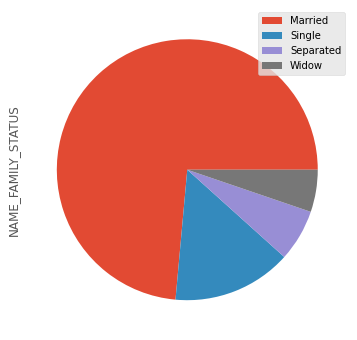

House / apartment      0.887346
With parents           0.048259
Municipal apartment    0.036363
Rented apartment       0.015873
Office apartment       0.008510
Co-op apartment        0.003649
Name: NAME_HOUSING_TYPE, dtype: float64


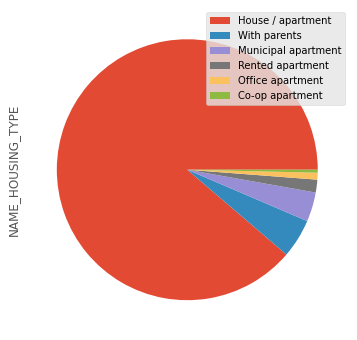

Other_type               0.313459
Laborers                 0.179459
Sales staff              0.104394
Core staff               0.089656
Managers                 0.069494
Drivers                  0.060496
High skill tech staff    0.037007
Accountants              0.031908
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64


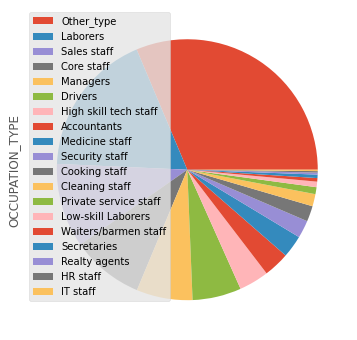

TUESDAY      0.175280
WEDNESDAY    0.168887
MONDAY       0.164919
THURSDAY     0.164516
FRIDAY       0.163693
SATURDAY     0.110085
SUNDAY       0.052620
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64


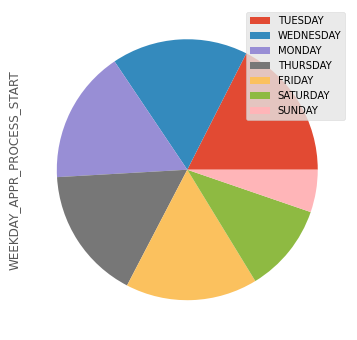

Business Entity Type 3    0.221103
XNA                       0.180073
Self-employed             0.124914
Other                     0.054252
Medicine                  0.036399
Business Entity Type 2    0.034315
Government                0.033833
School                    0.028920
Trade: type 7             0.025466
Kindergarten              0.022373
Construction              0.021856
Business Entity Type 1    0.019460
Transport: type 4         0.017554
Trade: type 3             0.011356
Industry: type 9          0.010953
Industry: type 3          0.010660
Security                  0.010559
Housing                   0.009619
Industry: type 11         0.008793
Military                  0.008566
Bank                      0.008153
Agriculture               0.007980
Police                    0.007613
Transport: type 2         0.007167
Postal                    0.007014
Security Ministries       0.006419
Trade: type 2             0.006179
Restaurant                0.005889
Services            

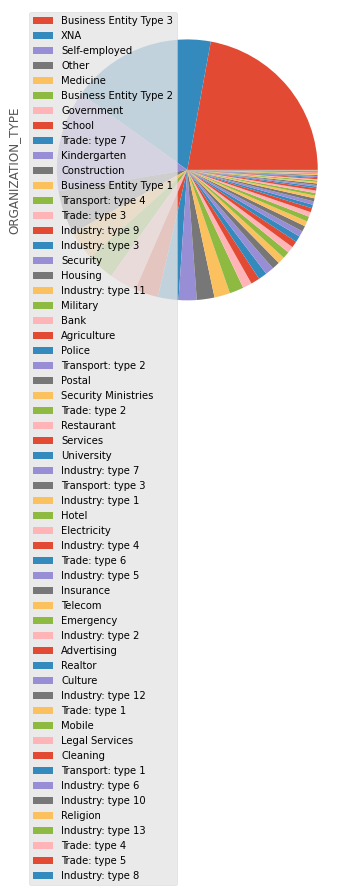

Approved             0.697439
Canceled             0.126537
Refused              0.107698
Fisrt_Application    0.053501
Unused offer         0.014826
Name: PREV_CONTRACT_STATUS, dtype: float64


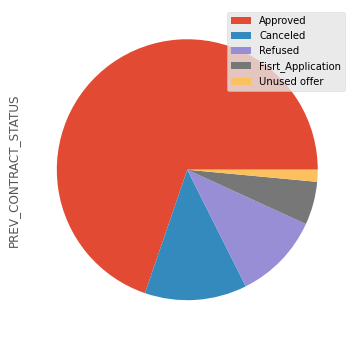

XAP       0.870544
HC        0.061473
LIMIT     0.026108
SCO       0.017330
CLIENT    0.015664
SCOFR     0.005707
XNA       0.001605
VERIF     0.001488
SYSTEM    0.000082
Name: PREV_REJECT_REASON, dtype: float64


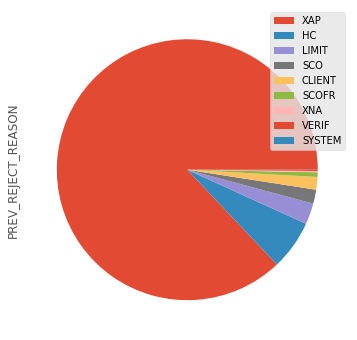

middle        0.252378
XNA           0.235343
high          0.235109
low_normal    0.208850
low_action    0.068320
Name: PREV_YIELD_GROUP, dtype: float64


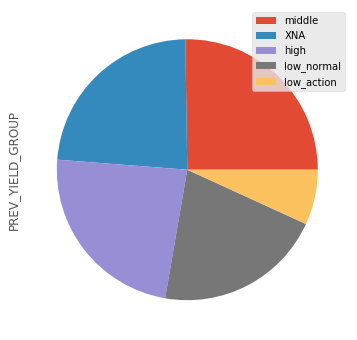

safe       0.919274
default    0.080726
Name: TARGET_CATEGORY, dtype: float64


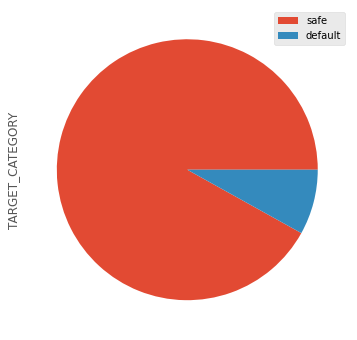

In [209]:
for x in app_file.columns:
    if app_file[x].dtypes=="object":
        print(app_file[x].value_counts(normalize=True))
        plt.figure(figsize=[6,6])
        app_file[x].value_counts(normalize=True).plot.pie(labeldistance=None)
        plt.legend()
        plt.show()

-Cash loan is offered higher comparable to revolving loan.
-Maximum process are not happened over weekends.
-House/appartment is quite more compare to otehr types
-Married are more percentage(735610)
Above are the exact data on object types.

#### Standardizing Values to more readable

Since AGE is already converted to readable , now doing the same to DAYS_EMPLOYED


In [58]:
#DAYS_EMPLOYED into EXPERIENCE in years

app_file['EMP_EXPERIENCE'] = np.round(app_file.DAYS_EMPLOYED / -365, 1)
app_file['EMP_EXPERIENCE']

0            1.7
1            3.3
2            0.6
3            8.3
4            8.3
           ...  
307506       0.6
307507   -1000.7
307508      21.7
307509      13.1
307510       3.5
Name: EMP_EXPERIENCE, Length: 307510, dtype: float64

Inspecting the negative values in EMP_Experience column 

In [59]:
app_file[app_file['EMP_EXPERIENCE'] < 0].EMP_EXPERIENCE.value_counts()

-1000.7    55374
Name: EMP_EXPERIENCE, dtype: int64

Observed negative values are same and seems to be a default value. So such values to be standardized by considering it as NaN, since we dont know what they refer to at this point of time.

In [60]:
app_file.loc[app_file['EMP_EXPERIENCE'] < 0, 'EMP_EXPERIENCE'] = np.NaN
app_file.loc[app_file['EMP_EXPERIENCE'] < 0, 'EMP_EXPERIENCE'].value_counts()

Series([], Name: EMP_EXPERIENCE, dtype: int64)

In [61]:
app_file.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG,AGE_Ref,EMP_EXPERIENCE
count,307510.000000,307510.000000,307510.000000,3.075100e+05,3.075100e+05,307498.000000,3.072320e+05,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,104582.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307508.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,307510.000000,134132.000000,3.068500e+05,246545.000000,151449.000000,306489.000000,306489.000000,306489.000000,306489.000000,307509.000000,265991.000000,265991.000000,265991.000000,265991.000000,265991.000000,265991.000000,307338.000000,307510.000000,252136.000000
mean,278181.049335,0.080726,0.417050,1.684180e+05,5.990261e+05,27108.576882,5.383965e+05,0.020868,-16037.006195,63815.256424,-4986.114553,-2994.200263,12.061091,0.999997,0.819889,0.199369,0.998133,0.281067,0.056720,2.152663,2.052463,2.031521,12.063413,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143940e-01,0.510854,0.117441,1.422250,0.143421,1.405297,0.100049,-962.861919,0.006402,0.007000,0.034362,0.267396,0.265475,1.899978,0.509252,44.433121,6.531921
std,102789.921101,0.272414,0.722122,1.088118e+05,4.024914e+05,14493.760789,3.694470e+05,0.013831,4363.991364,141275.947995,3522.890593,1509.452420,11.944812,0.001803,0.384281,0.399527,0.043164,0.449521,0.231307,0.910682,0.509035,0.502738,3.265836,0.122127,0.219526,0.197499,0.268444,0.421124,0.383817,0.211063,1.910591e-01,0.194843,0.108241,2.400991,0.446699,2.379806,0.362291,826.808008,0.083849,0.110758,0.204685,0.916004,0.794057,1.869298,0.149801,11.954500,6.406573
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014568,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000006,21.000000,0.000000
25%,189146.250000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.750000,-4299.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.334007,3.924574e-01,0.370650,0.057700,0.000000,0.000000,0.000000,0.000000,-1570.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.413648,35.000000,2.100000
50%,278202.500000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.500000,-4504.000000,-3254.000000,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.505998,5.659641e-01,0.535276,0.087600,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.524503,44.000000,4.500000
75%,367142.750000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,

In [62]:
app_file.NAME_FAMILY_STATUS.value_counts()

Married                 196431
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

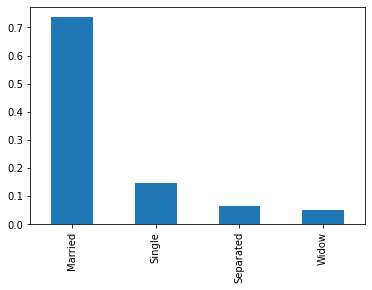

In [75]:
app_file['NAME_FAMILY_STATUS'].value_counts(normalize=True).plot.bar()
plt.show()

Merging Married and Civil Married Columns. Dropping th e unknown since thats not going to help in our analysis

In [65]:
app_file["NAME_FAMILY_STATUS"].replace({"Civil marriage": "Married", "Single / not married": "Single"}, inplace=True)

In [67]:
# drop rows of status name Unknown
app_file = app_file[~(app_file.NAME_FAMILY_STATUS == 'Unknown')]
app_file[(app_file.NAME_FAMILY_STATUS == 'Unknown')]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG,AGE_Ref,EMP_EXPERIENCE


Analyzing Loan contract type

In [68]:
app_file.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278231
Revolving loans     29277
Name: NAME_CONTRACT_TYPE, dtype: int64

checking Gender column

In [69]:
app_file.CODE_GENDER.value_counts(normalize=True)*100

F      65.834385
M      34.164314
XNA     0.001301
Name: CODE_GENDER, dtype: float64

#### Combining Total Credit Searches into one column view

In [70]:
app_file['Credit_Bureau_Total'] = app_file.iloc[:,-9:-3].sum(axis=1)
app_file.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG,AGE_Ref,EMP_EXPERIENCE,Credit_Bureau_Total
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,26.0,1.7,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757,46.0,3.3,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642739,53.0,0.6,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0.650442,53.0,8.3,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738,55.0,8.3,0.0


#### Previous application check

In [77]:
pre_app = pd.read_csv('previous_application.csv')
pre_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
pre_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [79]:
pre_app.shape

(1670214, 37)

In [81]:
pre_app.isna().mean() *100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

Checking the previous app to get to know whether an applicant is new. If an applicant is existing cust, we can use the information like whether the previous one was successfull or failure, and reason. If successful, check whetehr loan is completed or left out due amount

In [82]:
pre_app.NAME_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved        62.074740
Canceled        18.938831
Refused         17.403638
Unused offer     1.582791
Name: NAME_CONTRACT_STATUS, dtype: float64

In [83]:
pre_app.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize=True)

Y    0.994926
N    0.005074
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

In [84]:
#keeping only the last application of all previous applications and dropping the rest data
pre_app = pre_app[pre_app.FLAG_LAST_APPL_PER_CONTRACT == 'Y']
pre_app.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize=True)

Y    1.0
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

In [85]:
pre_app.NFLAG_LAST_APPL_IN_DAY.value_counts(normalize=True)

1    0.999527
0    0.000473
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64

In [86]:
pre_app = pre_app.sort_values('SK_ID_PREV', ascending=False).drop_duplicates('SK_ID_CURR')

In [87]:
pre_app[pre_app.DAYS_TERMINATION > 0].head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
888701,2843497,451578,Cash loans,9175.185,132482.97,149969.97,NaN,132482.97,WEDNESDAY,11,Y,0,NaN,NaN,NaN,XNA,Approved,-618,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,24.0,middle,Cash Street: middle,365243.0,-588.0,102.0,365243.0,365243.0,1.0
1345642,2843496,425374,Revolving loans,31500.000,630000.00,630000.00,NaN,630000.00,THURSDAY,15,Y,1,NaN,NaN,NaN,XAP,Approved,-465,XNA,XAP,Unaccompanied,Repeater,XNA,Cards,x-sell,Credit and cash offices,-1,XNA,0.0,XNA,Card X-Sell,-454.0,-423.0,365243.0,365243.0,365243.0,0.0
298226,2843493,337804,Revolving loans,2250.000,45000.00,45000.00,NaN,45000.00,THURSDAY,17,Y,1,NaN,NaN,NaN,XAP,Approved,-459,XNA,XAP,Unaccompanied,Repeater,XNA,Cards,walk-in,Credit and cash offices,-1,XNA,0.0,XNA,Card Street,-438.0,-410.0,365243.0,365243.0,365243.0,0.0
1489940,2843491,107385,Cash loans,25421.985,841500.00,963684.00,NaN,841500.00,FRIDAY,12,Y,1,NaN,NaN,NaN,XNA,Approved,-304,Cash through the bank,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,60.0,low_action,Cash X-Sell: low,365243.0,-274.0,1496.0,365243.0,365243.0,1.0
728908,2843487,424008,Consumer loans,7179.795,78402.87,78399.00,3.87,78402.87,FRIDAY,15,Y,1,0.000054,NaN,NaN,XAP,Approved,-264,Cash through the bank,XAP,Unaccompanied,Repeater,Computers,POS,XNA,Country-wide,150,Consumer electronics,12.0,low_action,POS household without interest,365243.0,-233.0,97.0,365243.0,365243.0,0.0


In [88]:
pre_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,3.388570e+05,338857.000000,283220.000000,3.388570e+05,3.388570e+05,2.016330e+05,2.810100e+05,338857.000000,338857.000000,201633.000000,2017.000000,2017.000000,338857.000000,3.388570e+05,283223.000000,241613.000000,241613.000000,241613.000000,241613.000000,241613.000000,241613.000000
mean,2.381519e+06,278149.909581,14384.489882,1.542189e+05,1.696456e+05,7.173869e+03,1.859655e+05,12.666443,0.999510,0.081317,0.189598,0.770040,-910.826399,4.153943e+02,14.288642,345400.109729,11685.070402,28476.522315,77895.231701,84373.947213,0.266360
std,4.462442e+05,102879.193103,13471.067322,2.537686e+05,2.750492e+05,2.196958e+04,2.678646e+05,3.374801,0.022128,0.109824,0.091485,0.099143,781.486559,1.208439e+04,12.427914,82919.215232,67100.666038,99034.045169,150511.995695,154783.432532,0.442056
min,1.000005e+06,100001.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.034781,0.373150,-2922.000000,-1.000000e+00,0.000000,-2922.000000,-2891.000000,-2801.000000,-2883.000000,-2844.000000,0.000000
25%,2.163424e+06,189061.000000,5942.677500,2.915550e+04,3.195000e+04,0.000000e+00,4.737712e+04,10.000000,1.000000,0.000000,0.160716,0.715645,-1339.000000,-1.000000e+00,6.000000,365243.000000,-1542.000000,-1154.000000,-1232.000000,-1180.000000,0.000000
50%,2.537478e+06,278221.000000,10215.180000,7.387200e+04,7.938000e+04,1.782000e+03,9.458977e+04,13.000000,1.000000,0.059693,0.189122,0.835095,-624.000000,3.000000e+01,12.000000,365243.000000,-749.000000,-316.000000,-457.000000,-421.000000,0.000000
75%,2.728302e+06,367302.000000,17717.400000,1.575000e+05,1.755000e+05,8.536500e+03,1.890000e+05,15.000000,1.000000,0.108914,0.193330,0.852537,-309.000000,1.420000e+02,18.000000,365243.000000,-380.000000,78.000000,-54.000000,-26.000000,1.000000
max,2.845382e+06,456255.000000,298557.585000,4.050000e+06,4.050000e+06,2.475000e+06,4.050000e+06,23.000000,1.000000,0.989740,0.806769,0.867336,-2.000000,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [89]:
pre_app.shape

(338857, 37)

#### Keeping the required data infos from previous applciation and dropping the rest

In [91]:
pre_app1 = pre_app[['SK_ID_CURR', 'AMT_CREDIT', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON', 'NAME_YIELD_GROUP', 'DAYS_TERMINATION']]
pre_app1.head()

,SK_ID_CURR,AMT_CREDIT,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_YIELD_GROUP,DAYS_TERMINATION
205485,406596,30912.75,Unused offer,CLIENT,XNA,NaN
717142,140761,41499.00,Unused offer,CLIENT,XNA,NaN
886179,237546,60673.50,Refused,LIMIT,middle,NaN
359118,100125,59503.50,Refused,SCO,middle,NaN
70058,250234,108180.00,Refused,SCO,low_action,NaN


#### Renaming the columns into meaningful in context of current application

In [93]:
names = {'CODE_REJECT_REASON':'PREV_REJECT_REASON','NAME_CONTRACT_STATUS': 'PREV_CONTRACT_STATUS',
         'DAYS_TERMINATION':'PREV_DAYS_TERMINATION', 
        'NAME_YIELD_GROUP':'PREV_YIELD_GROUP','AMT_CREDIT': 'PREV_AMT_CREDIT'}

pre_app1 = pre_app1.rename(columns=names)
pre_app1.head()

,SK_ID_CURR,PREV_AMT_CREDIT,PREV_CONTRACT_STATUS,PREV_REJECT_REASON,PREV_YIELD_GROUP,PREV_DAYS_TERMINATION
205485,406596,30912.75,Unused offer,CLIENT,XNA,NaN
717142,140761,41499.00,Unused offer,CLIENT,XNA,NaN
886179,237546,60673.50,Refused,LIMIT,middle,NaN
359118,100125,59503.50,Refused,SCO,middle,NaN
70058,250234,108180.00,Refused,SCO,low_action,NaN


Fix anomalies - PREV_DAYS_TERMINATION columns

In [94]:
pre_app1.PREV_DAYS_TERMINATION.value_counts(normalize=True)

 365243.0    0.232947
-9.0         0.000911
-15.0        0.000906
-17.0        0.000902
-144.0       0.000902
               ...   
-2760.0      0.000004
-2768.0      0.000004
-2801.0      0.000004
-2844.0      0.000004
-2790.0      0.000004
Name: PREV_DAYS_TERMINATION, Length: 2785, dtype: float64

In [95]:
pre_app1.PREV_DAYS_TERMINATION[pre_app1.PREV_DAYS_TERMINATION > 0].value_counts()

365243.0    56283
Name: PREV_DAYS_TERMINATION, dtype: int64

# Replacing 365243.0 value into NaN 

In [96]:
pre_app1.PREV_DAYS_TERMINATION.replace({365243.0 : np.NaN}, inplace=True)
pre_app1.PREV_DAYS_TERMINATION[pre_app1.PREV_DAYS_TERMINATION > 0].value_counts()

Series([], Name: PREV_DAYS_TERMINATION, dtype: int64)

Merging - prev application to current appliaction data sets by doing that, we will not lose any entry in the current one

In [97]:
app_file = pd.merge(left=app_file,right=pre_app1, how='left', left_on='SK_ID_CURR', right_on='SK_ID_CURR')
app_file.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_AVG,AGE_Ref,EMP_EXPERIENCE,Credit_Bureau_Total,PREV_AMT_CREDIT,PREV_CONTRACT_STATUS,PREV_REJECT_REASON,PREV_YIELD_GROUP,PREV_DAYS_TERMINATION
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,2.0,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0,0.161787,26.0,1.7,1.0,179055.0,Approved,XAP,low_normal,-17.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,1.0,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0,0.466757,46.0,3.3,0.0,348637.5,Approved,XAP,middle,-639.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,0.0,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0,0.642739,53.0,0.6,0.0,20106.0,Approved,XAP,middle,-714.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,NaN,0.650442,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN,0.650442,53.0,8.3,0.0,0.0,Canceled,XAP,XNA,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,NaN,0.322738,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322738,55.0,8.3,0.0,284400.0,Approved,XAP,middle,NaN


In [100]:
app_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307508 entries, 0 to 307507
Data columns (total 65 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307508 non-null  int64  
 1   TARGET                       307508 non-null  int64  
 2   NAME_CONTRACT_TYPE           307508 non-null  object 
 3   CODE_GENDER                  307508 non-null  object 
 4   FLAG_OWN_CAR                 307508 non-null  object 
 5   FLAG_OWN_REALTY              307508 non-null  object 
 6   CNT_CHILDREN                 307508 non-null  int64  
 7   AMT_INCOME_TOTAL             307508 non-null  float64
 8   AMT_CREDIT                   307508 non-null  float64
 9   AMT_ANNUITY                  307496 non-null  float64
 10  AMT_GOODS_PRICE              307232 non-null  float64
 11  NAME_TYPE_SUITE              306218 non-null  object 
 12  NAME_INCOME_TYPE             307508 non-null  object 
 13 

Lets check now the null values present in previous application data

In [101]:
app_file.PREV_CONTRACT_STATUS.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
307503    False
307504    False
307505    False
307506    False
307507    False
Name: PREV_CONTRACT_STATUS, Length: 307508, dtype: bool

In [102]:
app_file.PREV_CONTRACT_STATUS.isna().median()

0.0

In [103]:
app_file.PREV_CONTRACT_STATUS.isna().mean()

0.05350104712722921

In [104]:
# fill na in- PREV_CONTRACT_STATUS with First_Application

app_file.PREV_CONTRACT_STATUS.fillna('Fisrt_Application', inplace=True)
app_file.PREV_CONTRACT_STATUS.isna().mean()

0.0

#### Univariate Analysis

Lets start analysis from Occupation type from application(app_file) file

In [107]:
app_file.OCCUPATION_TYPE.value_counts(normalize=True)*100

Other_type               31.345851
Laborers                 17.945875
Sales staff              10.439403
Core staff                8.965620
Managers                  6.949413
Drivers                   6.049599
High skill tech staff     3.700717
Accountants               3.190811
Medicine staff            2.776188
Security staff            2.185634
Cooking staff             1.933608
Cleaning staff            1.513131
Private service staff     0.862417
Low-skill Laborers        0.680633
Waiters/barmen staff      0.438363
Secretaries               0.424379
Realty agents             0.244221
HR staff                  0.183085
IT staff                  0.171052
Name: OCCUPATION_TYPE, dtype: float64

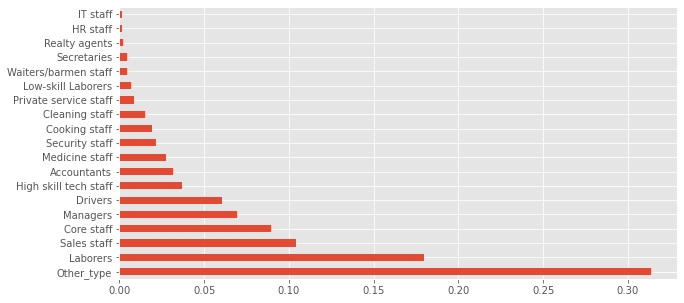

In [127]:
#### OCCUPATION type bar chart

plt.figure(figsize=(10,5))
app_file[~(app_file.OCCUPATION_TYPE == 'Others')].OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

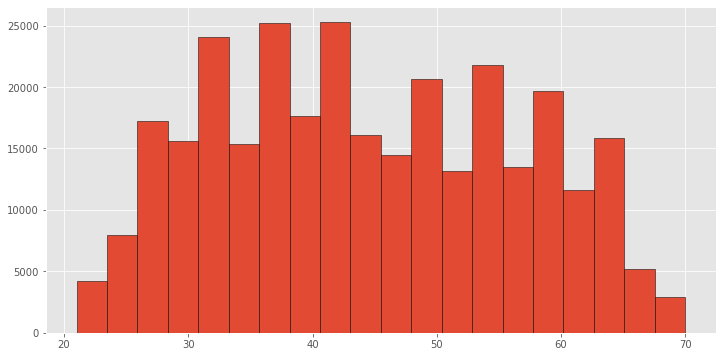

In [112]:
plt.style.use('ggplot')
plt.figure(figsize=(12,6))
plt.hist(app_file.AGE_Ref,bins = 20, edgecolor='Black')
plt.show()

In [114]:
# age can bin to age into groups LIKE - below >30, 30-40, 40-50, 50-60, 60 plus

age_differences = ['<30','30-40','40-50','50-60','60+']
app_file['AGE_GRP'] = pd.cut(app_file.AGE_Ref, [0,30,40,50,60,999], labels=age_differences)
app_file['AGE_GRP'].value_counts(normalize=True)*100

30-40    26.765157
40-50    24.890735
50-60    22.133408
<30      14.640595
60+      11.570105
Name: AGE_GRP, dtype: float64

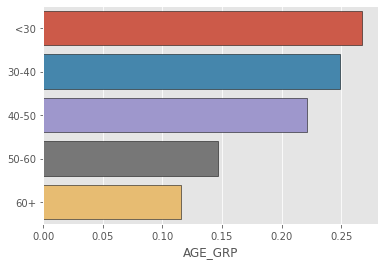

In [116]:
sns.barplot(app_file.AGE_GRP.value_counts(normalize=True), age_differences,edgecolor='Black')
plt.show()

Analysing Target Var:

In [117]:
app_file.TARGET.value_counts(normalize=True)

0    0.919274
1    0.080726
Name: TARGET, dtype: float64

In [118]:
# deriving new category column from TARGET

app_file['TARGET_CATEGORY'] = app_file['TARGET'].apply(lambda x: 'default' if x == 1 else 'safe')
app_file.TARGET_CATEGORY.value_counts(normalize=True)*100

safe       91.927364
default     8.072636
Name: TARGET_CATEGORY, dtype: float64

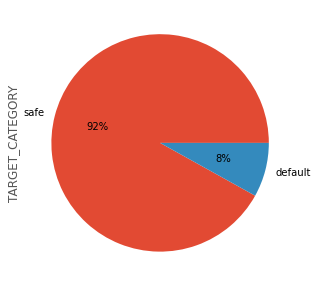

In [119]:
# Target_category_ Chart
plt.figure(figsize=(7,5))
app_file.TARGET_CATEGORY.value_counts(normalize=True).plot.pie(autopct='%1.0f%%')
plt.show()

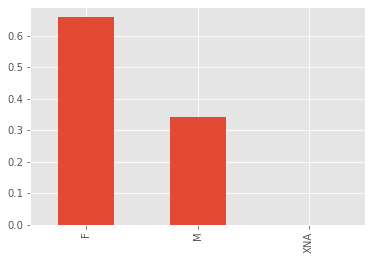

In [123]:
# Bar graph for gender columns
app_file.CODE_GENDER.value_counts(normalize = True).plot.bar()
plt.show()

#### plot a bar graph for Education type columns

In [124]:
app_file.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218390
Higher education                  74862
Incomplete higher                 10277
Lower secondary                    3815
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

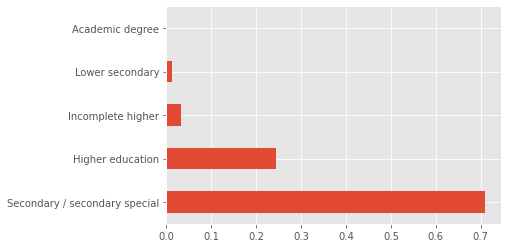

In [125]:
app_file.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

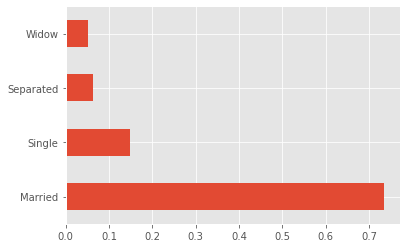

In [126]:
# bar chart for family status

app_file.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.barh()
plt.show()

#### Previous Application _View

Bar chart for prev app

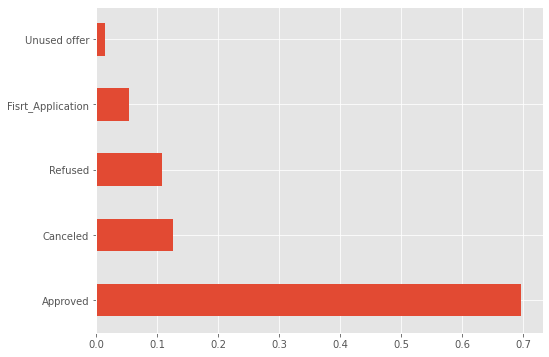

In [128]:
plt.figure(figsize=(8,6))
app_file.PREV_CONTRACT_STATUS.value_counts(normalize=True).plot.barh()
plt.show()

### In Numbers

In [129]:
app_file.PREV_CONTRACT_STATUS.value_counts(normalize=True)*100

Approved             69.743877
Canceled             12.653655
Refused              10.769801
Fisrt_Application     5.350105
Unused offer          1.482563
Name: PREV_CONTRACT_STATUS, dtype: float64

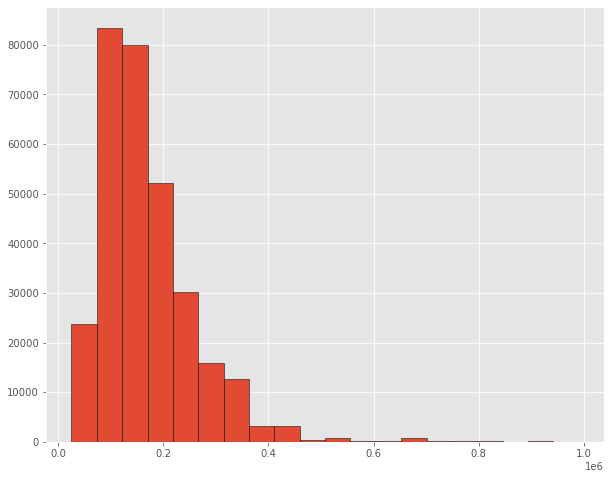

In [131]:
#AMT_INCOME_TOTAL
plt.figure(figsize=(10,8))
plt.hist(app_file[app_file.AMT_INCOME_TOTAL < 10**6].AMT_INCOME_TOTAL, bins=20, edgecolor='Black')
plt.show()

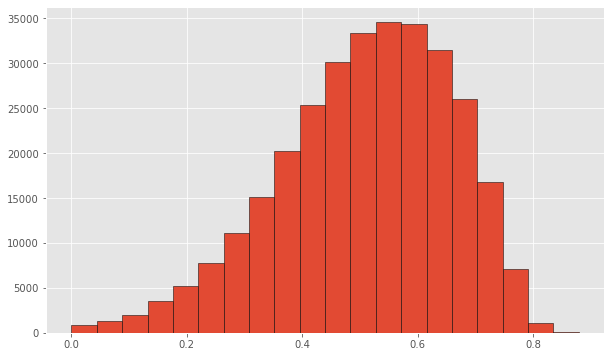

In [132]:
#EXT_SOURCE_AVG
plt.figure(figsize=(10,6))
plt.hist(app_file.EXT_SOURCE_AVG, bins=20, edgecolor='Black')
plt.show()

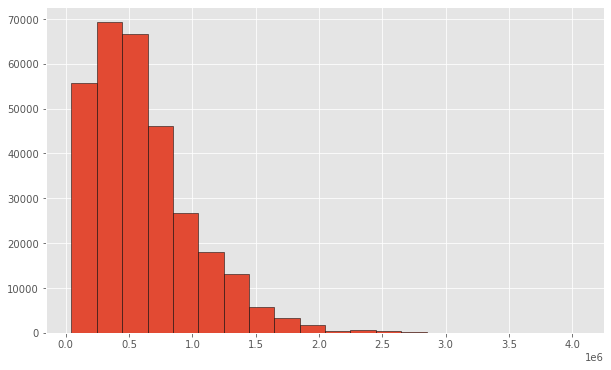

In [133]:
#AMT_CREDIT
plt.figure(figsize=(10,6))
plt.hist(app_file.AMT_CREDIT, bins=20, edgecolor='Black')
plt.show()

Numeric - Categorical

### Bivariate Analysis

In [135]:
app_file.groupby('OCCUPATION_TYPE').AMT_INCOME_TOTAL.aggregate(['mean', 'median'])


,mean,median
OCCUPATION_TYPE,,
Accountants,194577.550499,178218.0
Cleaning staff,130790.895551,112500.0
Cooking staff,138396.508176,126000.0
Core staff,172656.695254,157500.0
Drivers,187011.606413,180000.0
HR staff,188916.282416,158400.0
High skill tech staff,182842.045683,157500.0
IT staff,213465.601711,180000.0
Laborers,164240.355724,157500.0


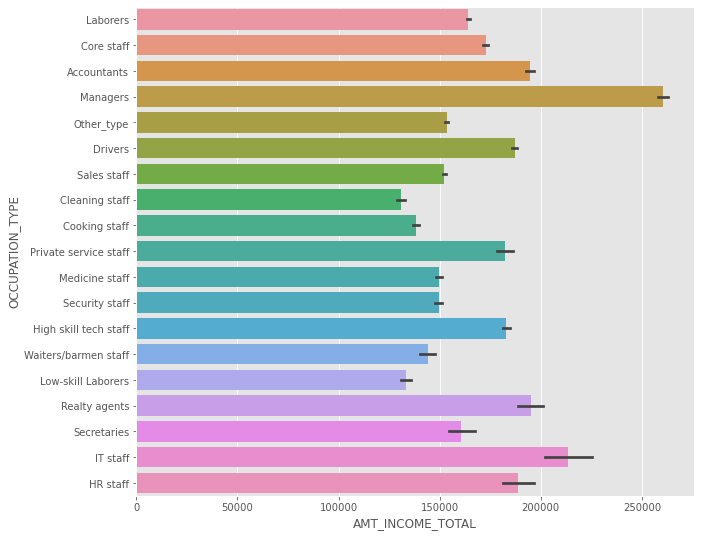

In [137]:
plt.figure(figsize=(10,9))
sns.barplot(app_file.AMT_INCOME_TOTAL, app_file.OCCUPATION_TYPE)
plt.show()

#### Checking education level with income

In [138]:
app_file.groupby('NAME_EDUCATION_TYPE').AMT_INCOME_TOTAL.aggregate(['mean', 'median'])

,mean,median
NAME_EDUCATION_TYPE,,
Academic degree,240009.146341,211500.0
Higher education,208652.135993,180000.0
Incomplete higher,181563.812397,157500.0
Lower secondary,129995.499869,112500.0
Secondary / secondary special,154623.483787,135000.0


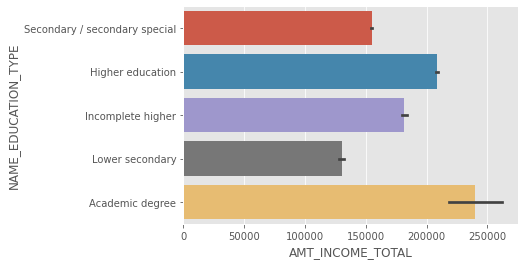

In [144]:
#_Education level vs Income
sns.barplot(app_file.AMT_INCOME_TOTAL, app_file.NAME_EDUCATION_TYPE)
plt.show()

Marital status vs loan Amount request view

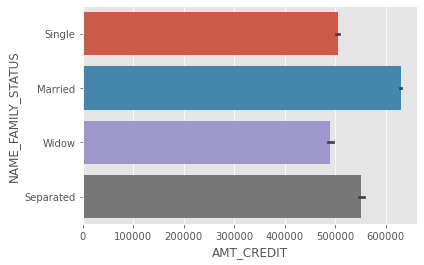

In [145]:
#Applicant Marital Status  vs Loan Amount requested 
sns.barplot(app_file.AMT_CREDIT, app_file.NAME_FAMILY_STATUS)
plt.show()

Comparing the previous application status and credit searchs

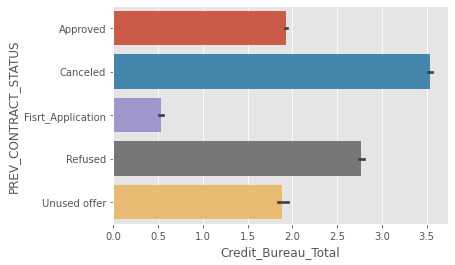

In [146]:
sns.barplot(app_file.Credit_Bureau_Total, app_file.PREV_CONTRACT_STATUS)
plt.show()

Target vs Loan amount

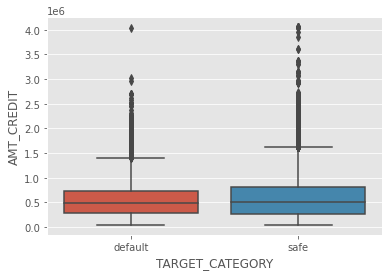

In [147]:
sns.boxplot(x=app_file.TARGET_CATEGORY, y=app_file.AMT_CREDIT)
plt.show()

#### Target vs ext Source core

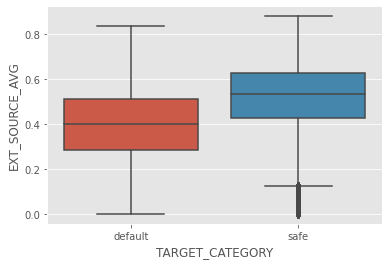

In [148]:
sns.boxplot(x=app_file.TARGET_CATEGORY, y=app_file.EXT_SOURCE_AVG)
plt.show()

Target vs Age_Ref , more accurately checking with exact age diff

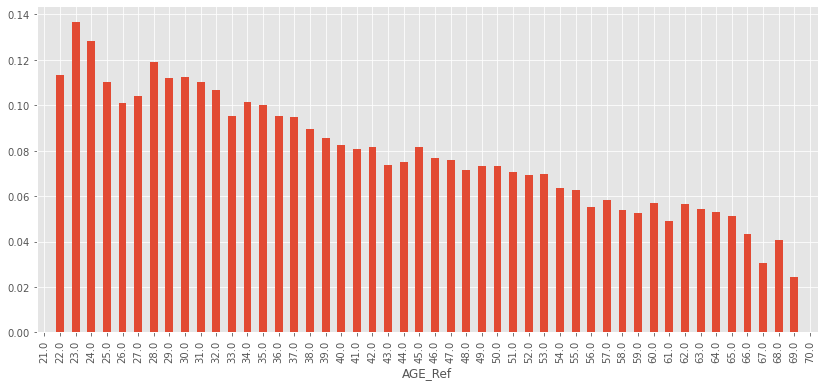

In [158]:
app_file.groupby('AGE_Ref').TARGET.mean().plot.bar(figsize=[14,6])
plt.show()

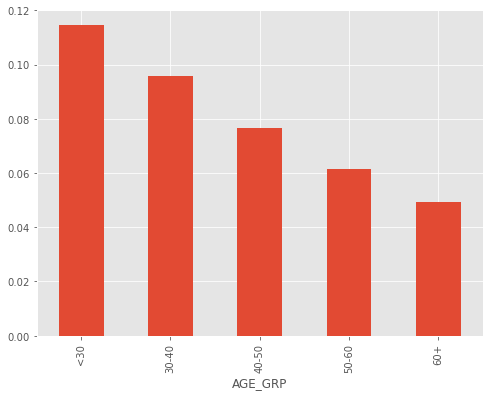

In [159]:
# Viewing with age differences 
app_file.groupby('AGE_GRP').TARGET.mean().plot.bar(figsize=[8,6])
plt.show()

Target vs Incoem

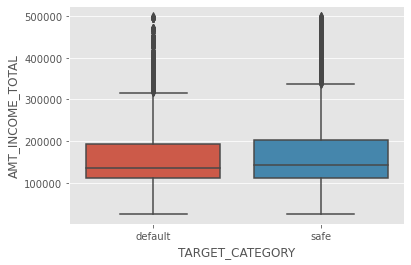

In [160]:
sns.boxplot(x=app_file.TARGET_CATEGORY, y=app_file[app_file.AMT_INCOME_TOTAL < 0.5*10**6].AMT_INCOME_TOTAL)
plt.show()

Target vs FamilyMembers

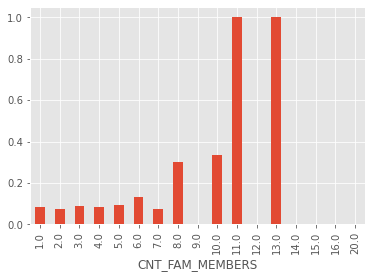

In [162]:
app_file.groupby('CNT_FAM_MEMBERS').TARGET.mean().plot.bar('Black')
plt.show()

#### CATEGORY : vs Target

Occupation type

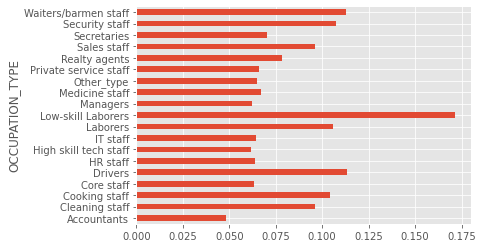

In [165]:
app_file.groupby('OCCUPATION_TYPE').TARGET.mean().plot.barh()
plt.show()

Family View :

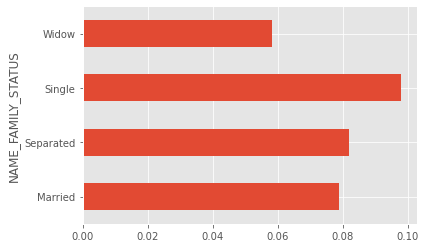

In [168]:
app_file.groupby('NAME_FAMILY_STATUS').TARGET.mean().plot.barh()
plt.show()

PREV_CONTRACT_STATUS vs 'Target'

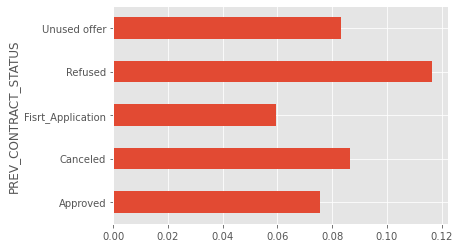

In [170]:
app_file.groupby('PREV_CONTRACT_STATUS').TARGET.mean().plot.barh()
plt.show()

PREV_REJECT_REASON vs 'Target'


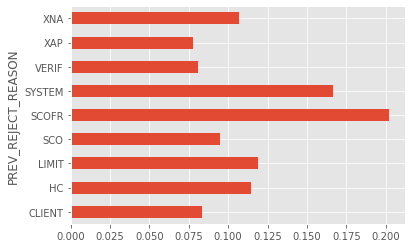

In [171]:
app_file.groupby('PREV_REJECT_REASON').TARGET.mean().plot.barh()
plt.show()

### Numeric

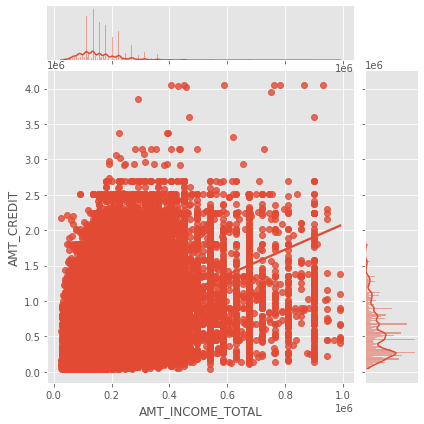

In [172]:
#Total Income vs Loan Amount requested 
sns.jointplot(data = app_file[app_file.AMT_INCOME_TOTAL < 10**6], x = 'AMT_INCOME_TOTAL', y = 'AMT_CREDIT', kind='reg')
plt.show()

#### Age vs Requested Loan Amount

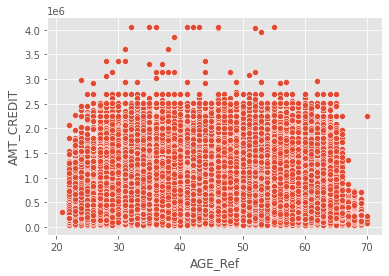

In [183]:
sns.scatterplot(app_file.AGE_Ref, app_file.AMT_CREDIT)
plt.show()

#### Multivariate_Analysis

Checking for TARGET vs NAME_FAMILY_STATUS vs OCCUPATION_TYPE

In [181]:
response = pd.pivot_table(data=app_file, index='OCCUPATION_TYPE', columns='NAME_FAMILY_STATUS', values='TARGET')
response

NAME_FAMILY_STATUS,Married,Separated,Single,Widow
OCCUPATION_TYPE,,,,
Accountants,0.045846,0.053352,0.058704,0.044521
Cleaning staff,0.097342,0.078652,0.122066,0.067265
Cooking staff,0.101545,0.084135,0.144550,0.059859
Core staff,0.060456,0.057576,0.080491,0.038880
Drivers,0.106101,0.145655,0.147986,0.153153
HR staff,0.056511,0.065217,0.066667,0.200000
High skill tech staff,0.059609,0.061252,0.072008,0.048327
IT staff,0.072674,0.000000,0.060000,0.000000
Laborers,0.101180,0.109462,0.132301,0.069250


In [177]:
app_file.TARGET.value_counts(normalize=True)

0    0.919274
1    0.080726
Name: TARGET, dtype: float64

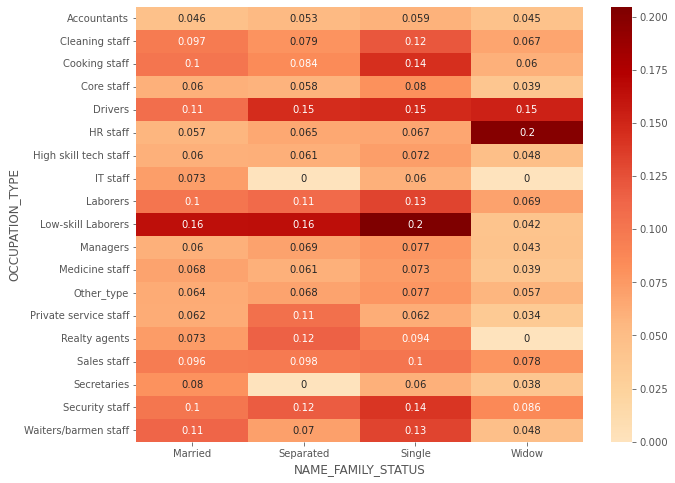

In [189]:
plt.figure(figsize=(10,8))
sns.heatmap(response, annot=True, cmap='OrRd', center=0.083)
plt.show()

#### TARGET vs OCCUPATION_TYPE vs NAME_EDUCATION_TYPE

In [191]:
resp = pd.pivot_table(data=app_file, index='OCCUPATION_TYPE', columns='NAME_EDUCATION_TYPE', values='TARGET')
resp

NAME_EDUCATION_TYPE,Academic degree,Higher education,Incomplete higher,Lower secondary,Secondary / secondary special
OCCUPATION_TYPE,,,,,
Accountants,0.125000,0.038813,0.056180,0.166667,0.062077
Cleaning staff,0.000000,0.084000,0.102041,0.138889,0.095664
Cooking staff,0.000000,0.088993,0.093220,0.171875,0.105135
Core staff,0.000000,0.045670,0.083902,0.105691,0.078621
Drivers,0.000000,0.083415,0.103870,0.128514,0.117219
HR staff,NaN,0.044818,0.083333,NaN,0.100000
High skill tech staff,0.000000,0.047261,0.070085,0.129032,0.071405
IT staff,NaN,0.049853,0.038462,0.000000,0.113636
Laborers,0.000000,0.076011,0.086326,0.160274,0.109829


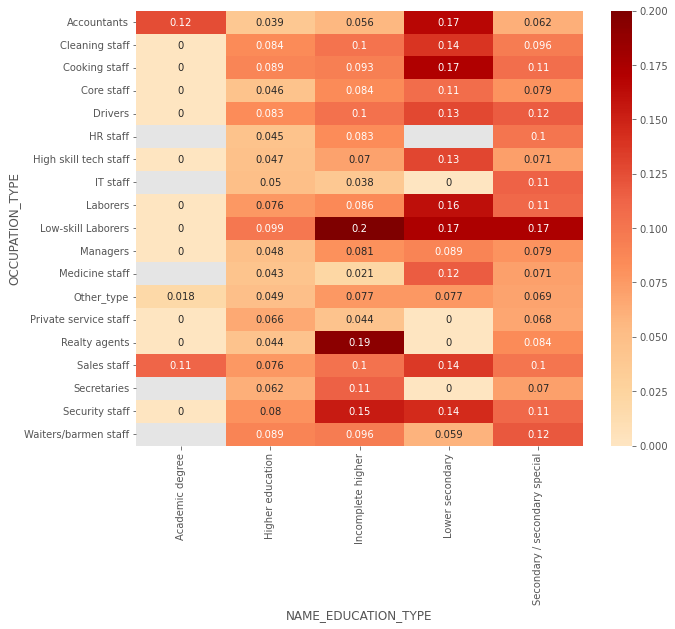

In [192]:
plt.figure(figsize=(10,8))
sns.heatmap(resp, annot=True, cmap='OrRd', center=0.083)
plt.show()

#### TARGET vs NAME_FAMILY_STATUS vs NAME_EDUCATION_TYPE

In [193]:
resp = pd.pivot_table(data=app_file, index='NAME_EDUCATION_TYPE', columns='NAME_FAMILY_STATUS', values='TARGET')
resp

NAME_FAMILY_STATUS,Married,Separated,Single,Widow
NAME_EDUCATION_TYPE,,,,
Academic degree,0.017544,0.000000,0.034483,0.000000
Higher education,0.051481,0.057346,0.062049,0.048094
Incomplete higher,0.081425,0.086643,0.094143,0.063584
Lower secondary,0.108170,0.138249,0.132988,0.067961
Secondary / secondary special,0.087434,0.089904,0.113243,0.059666


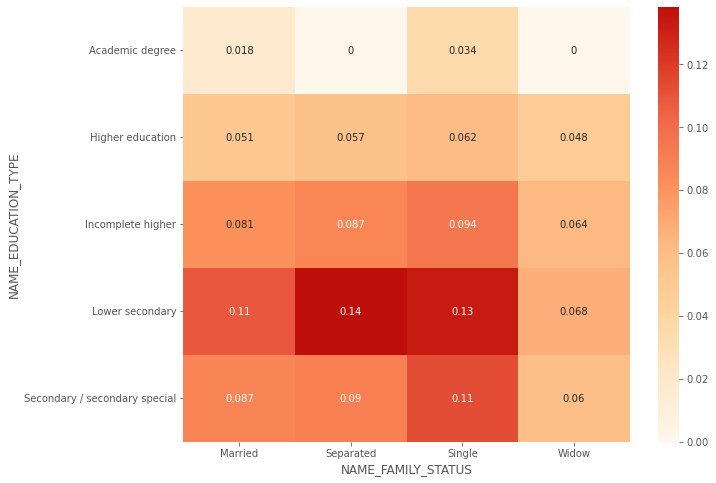

In [194]:
plt.figure(figsize=(10,8))
sns.heatmap(resp, annot=True, cmap='OrRd', center=0.083)
plt.show()

#### Final : Correlation between Target and Prominent numeric var

In [196]:
resp = app_file[['TARGET', 'AGE_Ref', 'AMT_INCOME_TOTAL','AMT_CREDIT', 'EXT_SOURCE_AVG', 'CNT_FAM_MEMBERS', 'Credit_Bureau_Total']].corr()
resp

,TARGET,AGE_Ref,AMT_INCOME_TOTAL,AMT_CREDIT,EXT_SOURCE_AVG,CNT_FAM_MEMBERS,Credit_Bureau_Total
TARGET,1.000000,-0.078232,-0.020457,-0.030369,-0.222036,0.009298,-0.002985
AGE_Ref,-0.078232,1.000000,-0.056616,0.055392,0.279730,-0.278894,0.069799
AMT_INCOME_TOTAL,-0.020457,-0.056616,1.000000,0.342172,0.082098,0.032363,0.065497
AMT_CREDIT,-0.030369,0.055392,0.342172,1.000000,0.143684,0.063160,0.006282
EXT_SOURCE_AVG,-0.222036,0.279730,0.082098,0.143684,1.000000,-0.037363,-0.003752
CNT_FAM_MEMBERS,0.009298,-0.278894,0.032363,0.063160,-0.037363,1.000000,-0.013251
Credit_Bureau_Total,-0.002985,0.069799,0.065497,0.006282,-0.003752,-0.013251,1.000000


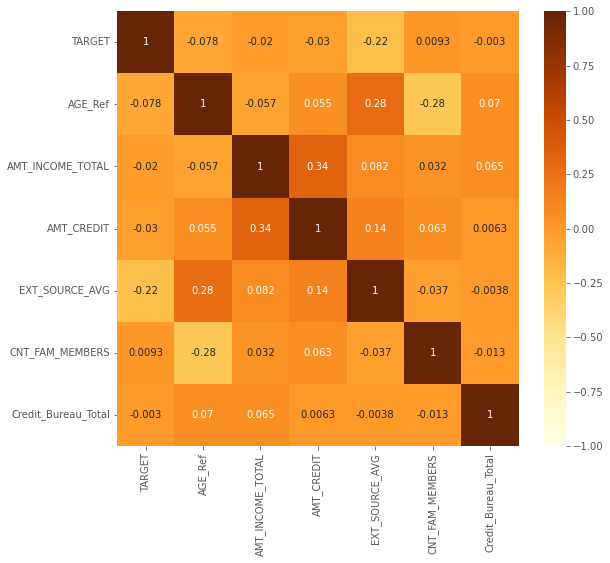

In [197]:
plt.figure(figsize=(9,8))
sns.heatmap(resp, annot=True, cmap='YlOrBr', vmin=-1,vmax=1)
plt.show()

#### Case Study - Summary

•	Bank given more cash loans earlier, after analysis bank should give more revolving loans
•	People with higher education can be concentrated more and older people default less
•	Loans previously Refused or cancelled – higher defaulter rate, can re-check and provide if eligibility checks met.
•	Providing loans to married is safer side, bank can concentrate to target married people
•	Single people should be considered only with higher education and profession level
•	Longer employment history – bank can target more
•	Bank can lend more to females